      product  total_qty   revenue
0       Phone          5  185000.0
1      Laptop          3  133000.0
2     Monitor          3   52000.0
3  Headphones          9   49000.0
4       Mouse         13   17000.0
5    Keyboard          8   17000.0
   total_qty  total_revenue
0         41       453000.0


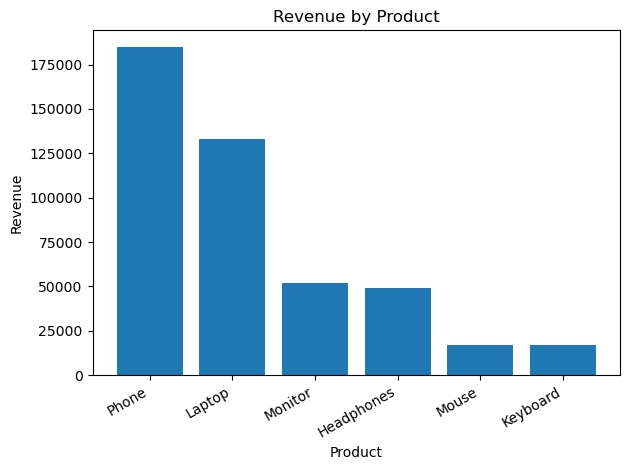

In [5]:
# Task 7

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("sales_data.db")

# Query summary by product
query = """
SELECT product, SUM(quantity) AS total_qty, 
       ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
ORDER BY revenue DESC;
"""
df = pd.read_sql_query(query, conn)
print(df)

# Query overall totals
totals = pd.read_sql_query("""
SELECT SUM(quantity) AS total_qty, 
       ROUND(SUM(quantity*price), 2) AS total_revenue
FROM sales;
""", conn)
print(totals)

# Plot bar chart
plt.bar(df["product"], df["revenue"])
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

conn.close()